# Hate Speech Detection

In [15]:
import pandas as panda
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import *
import string
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
import seaborn
# from textstat.textstat import *
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import numpy as np
from nltk.sentiment.vader import SentimentIntensityAnalyzer as VS
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [17]:
dataset = panda.read_csv(r"C:\Users\dines\Music\FINALCODE\Dataset\HateSpeechData.csv")
dataset

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [19]:
# Adding text-length as a field in the dataset
dataset['text length'] = dataset['tweet'].apply(len)


In [21]:
dataset.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,text length
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,140
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,85
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,120
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,62
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,137


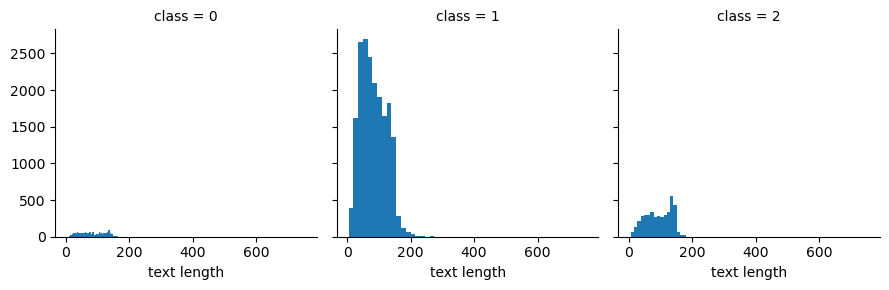

In [23]:
#Basic visualization of data using histograms
# FacetGrid- Multi-plot grid for plotting conditional relationships
import seaborn as sns
import matplotlib.pyplot as plt
graph = sns.FacetGrid(data=dataset, col='class')
graph.map(plt.hist, 'text length', bins=50)

<Axes: xlabel='class', ylabel='text length'>

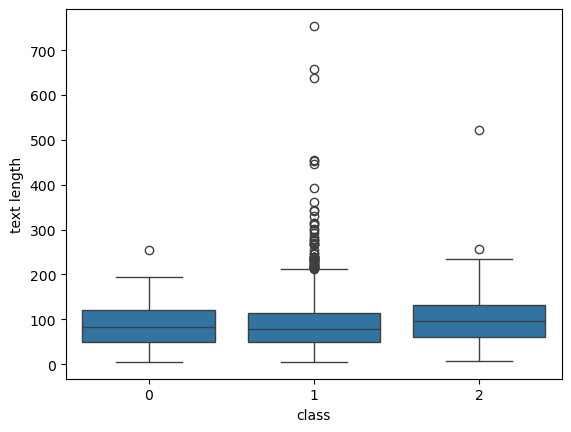

In [24]:
# Box-plot visvualization
sns.boxplot(x='class', y='text length', data=dataset)

<Axes: >

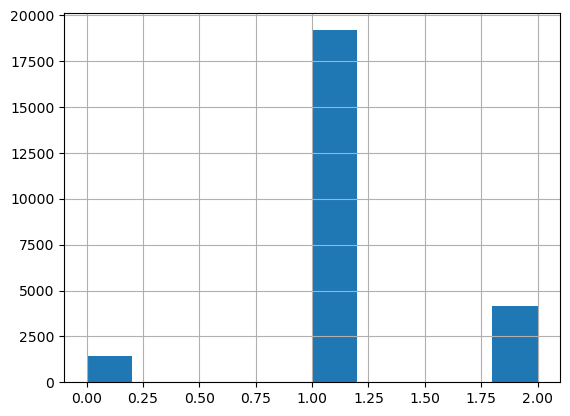

In [25]:
dataset['class'].hist()

In [26]:
# collecting only the tweets from the csv file into a variable name tweet
tweet=dataset.tweet

## Preprocessing of the tweets

In [ ]:
import nltk
nltk.download('stopwords')

In [ ]:
import re
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Load stopwords and extend them
stopwords_list = stopwords.words("english")
additional_stopwords = ["#ff", "ff", "rt"]
stopwords_list.extend(additional_stopwords)

# Initialize stemmer
stemmer = PorterStemmer()

def preprocess(tweets):
    if not isinstance(tweets, pd.Series):
        raise ValueError("Input must be a pandas Series")

    # Removal of extra spaces
    tweets_space = tweets.str.replace(r'\s+', ' ', regex=True)

    # Removal of @name[mention]
    tweets_name = tweets_space.str.replace(r'@[\w\-]+', '', regex=True)

    # Removal of links [https://abc.com]
    tweets_no_urls = tweets_name.str.replace(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', regex=True)

    # Removal of punctuations and numbers
    tweets_no_punc = tweets_no_urls.str.replace(r'[^a-zA-Z]', ' ', regex=True)

    # Remove whitespace with a single space
    tweets_no_punc = tweets_no_punc.str.replace(r'\s+', ' ', regex=True)

    # Remove leading and trailing whitespace
    tweets_no_punc = tweets_no_punc.str.strip()

    # Replace numbers with a placeholder
    tweets_no_punc = tweets_no_punc.str.replace(r'\d+(\.\d+)?', 'numbr', regex=True)

    # Removal of capitalization
    tweets_lower = tweets_no_punc.str.lower()

    # Tokenizing
    tokenized_tweets = tweets_lower.apply(lambda x: x.split())

    # Removal of stopwords
    tokenized_tweets = tokenized_tweets.apply(lambda x: [word for word in x if word not in stopwords_list])

    # Stemming
    tokenized_tweets = tokenized_tweets.apply(lambda x: [stemmer.stem(word) for word in x])

    # Joining tokens back into a string
    processed_tweets = tokenized_tweets.apply(lambda x: ' '.join(x))

    return processed_tweets

# Example usage with DataFrame
# dataset is assumed to be a pandas DataFrame with a column 'tweet'
dataset['processed_tweets'] = preprocess(dataset['tweet'])
print(dataset[["tweet", "processed_tweets"]].head(10))


## Visualizations

In [ ]:

from wordcloud import WordCloud
all_words = ' '.join([text for text in dataset['tweet'] ])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
#random=0.30
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
# visualizing which of the word is most commonly used for hatred speech
hatred_words = ' '.join([text for text in dataset['tweet'][dataset['class'] == 0]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(hatred_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
# visualizing which of the word is most commonly used for offensive speech
offensive_words = ' '.join([text for text in dataset['tweet'][dataset['class'] == 1]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(offensive_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
# Combining all the above stundents 
from tqdm import tqdm
def preprocess_text(text_data):
    preprocessed_text = []
    # tqdm is for printing the status bar
    for sentance in tqdm(text_data):
        sent = decontracted(sentance)
        sent = sent.replace('\\r', ' ')
        sent = sent.replace('\\n', ' ')
        sent = sent.replace('\\"', ' ')
        sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
        # https://gist.github.com/sebleier/554280
        sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
        preprocessed_text.append(sent.lower().strip())
    return preprocessed_text

In [ ]:
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [ ]:
import re
import nltk
from nltk.corpus import stopwords

# Ensure you have the necessary NLTK data
nltk.download('stopwords')

# Load stopwords and extend them
stopwords_list = stopwords.words("english")
other_exclusions = ["#ff", "ff", "rt"]
stopwords_list.extend(other_exclusions)

def preprocess_text(text_data):
    if not isinstance(text_data, (list, np.ndarray)):
        raise ValueError("Input must be a list or numpy array")

    preprocessed_text = []
    
    for sent in text_data:
        # Remove punctuation and numbers, and replace with space
        sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
        # Remove stopwords
        sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords_list)
        # Convert to lowercase and strip any leading/trailing whitespace
        preprocessed_text.append(sent.lower().strip())
    
    return preprocessed_text

# Example usage
# Assuming dataset is a pandas DataFrame with a column 'tweet'
preprocessed_text = preprocess_text(dataset['tweet'].values)
dataset['processed_tweets'] = preprocessed_text
print(dataset[["tweet", "processed_tweets"]].head(10))


In [ ]:

preprocessed_text = preprocess_text(dataset['tweet'].values)

In [ ]:
print("printing some random reviews")
print(9, preprocessed_text[9])
print(34, preprocessed_text[34])
print(147, preprocessed_text[149])

In [ ]:
 y=np.array(dataset['class'])

In [ ]:
y

In [ ]:
from sklearn.model_selection import train_test_split
#Breaking into Train and test
X_train, X_test, y_train, y_test = train_test_split(preprocessed_text, y, test_size=0.3,stratify=y ,random_state=42)

## Feature Engineering

In [ ]:
import pickle
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
from sklearn import preprocessing

tfidf = TfidfVectorizer(ngram_range=(1,2), min_df=10)
count_trans = tfidf.fit(X_train) # fit has to happen only on train data

# Dump the file
pickle.dump(tfidf, open(r"C:\Users\dines\Music\FINALCODE\FRONT END\new_project\tfidf.pkl", "wb"))
# Testing phase
tfidf = pickle.load(open(r"C:\Users\dines\Music\FINALCODE\FRONT END\new_project\tfidf.pkl", 'rb'))

# we use the fitted CountVectorizer to convert the text to vector
X_train_tfidf =tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

#Normalize Data
X_train_tfidf = preprocessing.normalize(X_train_tfidf)
print("Train Data Size: ",X_train_tfidf.shape)

#Normalize Data
X_test_tfidf = preprocessing.normalize(X_test_tfidf)
print("Test Data Size: ",X_test_tfidf.shape)



### Running various model Using TFIDF without additional features

In [ ]:
rf=RandomForestClassifier()
rf.fit(X_train_tfidf,y_train)
filename = r'C:\Users\dines\Music\FINALCODE\FRONT END\new_project\rf_hatespeech.pkl'
pickle.dump(rf, open(filename, 'wb'))
y_preds = rf.predict(X_test_tfidf)
acc1=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
print("Random Forest, Accuracy Score:",acc1)

In [ ]:
from sklearn.metrics import confusion_matrix
import pandas as pd
class_names =['Hate','Offensive','Neither']
df_heatmap = pd.DataFrame(confusion_matrix(y_test, y_preds.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")